# Entrega 3: Clasificación

## Imports

In [1]:
#Datos
from sklearn.datasets import fetch_openml

#Tratamiento de datos
import numpy as np
import pandas as pd

#Visuazacion
import matplotlib.pyplot as plt
import seaborn as sns

#Algorimtos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Visaulizacion decision tree
from sklearn.tree import plot_tree


#Reduccion de dimensionalidad
from sklearn.decomposition import PCA

#Medir el progreso de ejecucion en loops
from tqdm import tqdm

#Metricas de performance
from sklearn.metrics import accuracy_score ,classification_report , confusion_matrix, ConfusionMatrixDisplay

## MNIST dataset

El conjunto de datos mnist_784 proviene de la base de datos MNIST (Modified National Institute of Standards and Technology), que es un conjunto de datos ampliamente utilizado en reconocimiento de imágenes y aprendizaje automático. MNIST es una colección de 70,000 imágenes de dígitos escritos a mano.

Cada imagen en el conjunto de datos MNIST es una imagen en escala de grises de 28x28 píxeles. En la versión mnist_784 de este conjunto de datos, cada imagen se ha "aplanado" en un vector de 1D de 784 características (es decir, 28x28 = 784), donde cada característica representa la intensidad de un píxel en la imagen. Por lo tanto, cada fila en el conjunto de datos mnist_784 representa una imagen.

El objetivo de este conjunto de datos es clasificar correctamente cada imagen en términos del dígito que representa (de 0 a 9). Las etiquetas correctas para cada imagen se proporcionan en el conjunto de datos.

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

## EDA

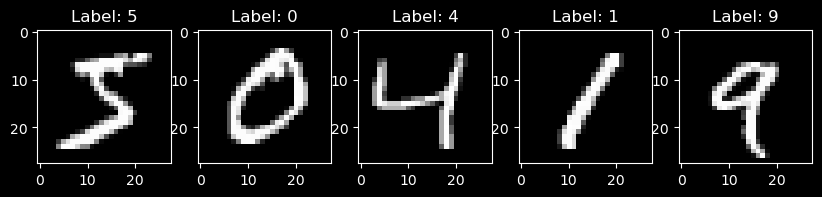

In [6]:
#Imprimimos las primeras 5 imagenes
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(mnist.data.to_numpy()[0:5], mnist.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray,interpolation='nearest')
  plt.title(f"Label: {label}")

In [7]:
#Definimos X (las variables/features) e y (target)
X, y = mnist["data"], mnist["target"]

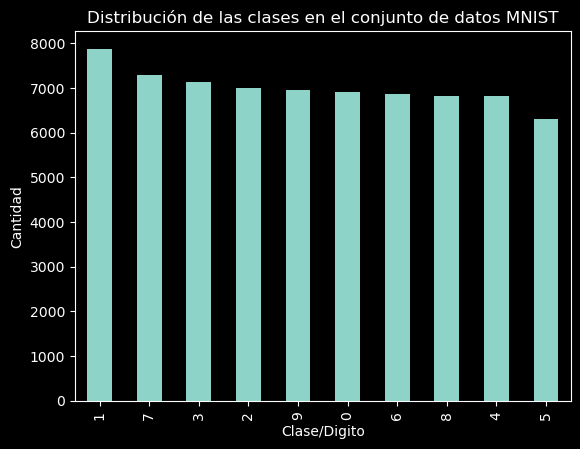

In [8]:
y.value_counts().plot(kind='bar')
plt.title('Distribución de las clases en el conjunto de datos MNIST')
plt.xlabel('Clase/Digito')
plt.ylabel('Cantidad')
plt.show()

In [9]:
#Convertimos cada imagen a matriz 28x28 y las clases a enteros solo a los efectos de un analisis exploratorio
X_image = X.to_numpy().reshape(-1, 28, 28)
y_image = y.astype(int)

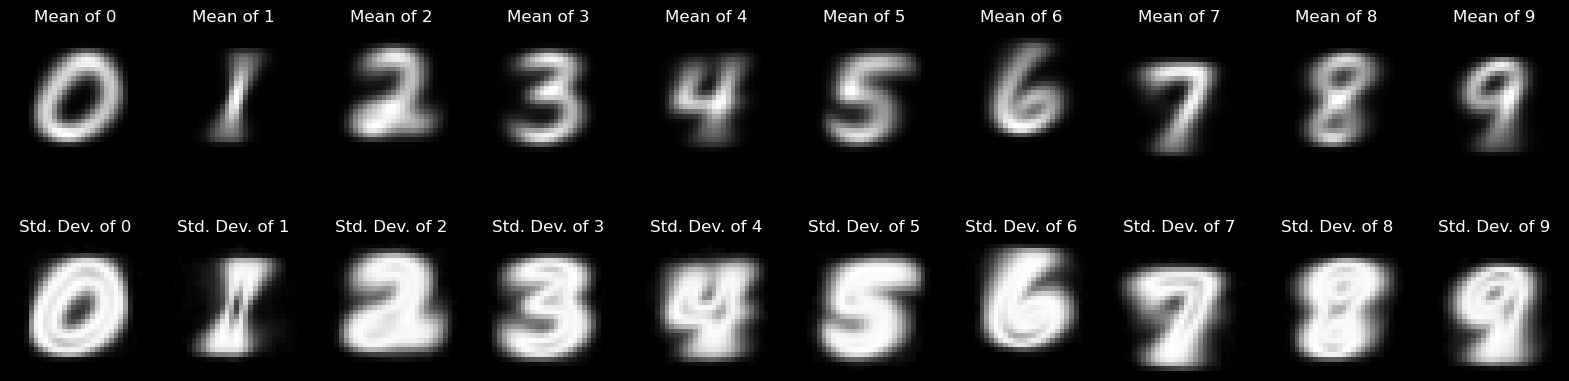

In [10]:

# Calculamos la imagen promedio y la desviación estándar para cada dígito
mean_images = []
std_images = []
for i in range(10):
    mean_images.append(np.mean(X_image[y_image==i], axis=0))
    std_images.append(np.std(X_image[y_image==i], axis=0))

# Visualizamos las imágenes promedio y las desviaciones estándar
fig, axs = plt.subplots(2, 10, figsize=(20, 5))

for i, (mean_img, std_img) in enumerate(zip(mean_images, std_images)):
    axs[0, i].imshow(mean_img, cmap=plt.cm.gray,interpolation='nearest')
    axs[0, i].set_title(f"Mean of {i}")
    axs[0, i].axis('off')
    
    axs[1, i].imshow(std_img, cmap=plt.cm.gray,interpolation='nearest')
    axs[1, i].set_title(f"Std. Dev. of {i}")
    axs[1, i].axis('off')

plt.show()

## PCA

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es un método estadístico que se utiliza para reducir la dimensionalidad de un conjunto de datos, mientras se conserva la mayor cantidad posible de la variación en los datos.

PCA transforma el conjunto de datos original a un nuevo sistema de coordenadas en el que la base está formada por los vectores propios. Los nuevos ejes (o componentes principales) son ortogonales entre sí y capturan la mayor variación en los datos.

Una de las ventajas de PCA es que al reducir la dimensionalidad del conjunto de datos, también puede ayudar a aliviar problemas de tiempos de ejecución que pueden surgir al trabajar con conjuntos de datos de alta dimensión. También se utiliza frecuentemente para la visualización de datos de alta dimensión.

In [11]:
n_components = 50  # Nueva cantidad de features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [12]:
pd.DataFrame(X_pca).shape

(70000, 50)

In [13]:
# Vamos a seleccionar 30k imagenes para realizar el entrenamiento y las predicciones (por un tema de tiempos de ejecucion)
# Seteamos ademas una semilla para tener reproducibilidad
np.random.seed(42)
random_indices = np.random.choice(
    X_pca.shape[0], 
    size = 30000, 
    replace=False
    )

# Seleccionamos las imagenes y su target
X_train = X_pca[random_indices]
y_train = y.iloc[random_indices]

# Ejercicios

Problema 1:

Realizar tres clasificaciones: KNN, regresión logistica y árboles de decisión.

In [14]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn.predict(X_train)

# Métricas
print('KNN Accuracy:', accuracy_score(y_train, y_pred_knn))
print(classification_report(y_train, y_pred_knn))

KNN Accuracy: 0.9803666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2967
           1       0.98      0.99      0.99      3381
           2       0.98      0.98      0.98      3004
           3       0.98      0.97      0.98      3029
           4       0.99      0.98      0.98      2844
           5       0.98      0.98      0.98      2699
           6       0.99      0.99      0.99      2975
           7       0.98      0.98      0.98      3185
           8       0.99      0.96      0.97      2887
           9       0.97      0.97      0.97      3029

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [25]:
# Regresion logistica
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_train)

# Métricas
print('Logistic Regression Accuracy:', accuracy_score(y_train, y_pred_lr))
print(classification_report(y_train, y_pred_lr))


Logistic Regression Accuracy: 0.9094666666666666
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2967
           1       0.94      0.97      0.96      3381
           2       0.90      0.88      0.89      3004
           3       0.89      0.87      0.88      3029
           4       0.91      0.92      0.92      2844
           5       0.86      0.86      0.86      2699
           6       0.94      0.95      0.94      2975
           7       0.92      0.93      0.93      3185
           8       0.88      0.85      0.86      2887
           9       0.89      0.89      0.89      3029

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



In [26]:
# Árboles de Decisión
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt.predict(X_train)

# Métricas
print('Decision Tree Accuracy:', accuracy_score(y_train, y_pred_dt))
print(classification_report(y_train, y_pred_dt))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2967
           1       1.00      1.00      1.00      3381
           2       1.00      1.00      1.00      3004
           3       1.00      1.00      1.00      3029
           4       1.00      1.00      1.00      2844
           5       1.00      1.00      1.00      2699
           6       1.00      1.00      1.00      2975
           7       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      2887
           9       1.00      1.00      1.00      3029

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



Ejercicio 2a:

Graficar el error en función del parametro K para KNN

Ejercicio 2b:

Graficar el error en función del parametro depth para el Árbol de Decisión


In [ ]:
from sklearn.metrics import mean_squared_error

100%|██████████| 9/9 [01:38<00:00, 10.97s/it]


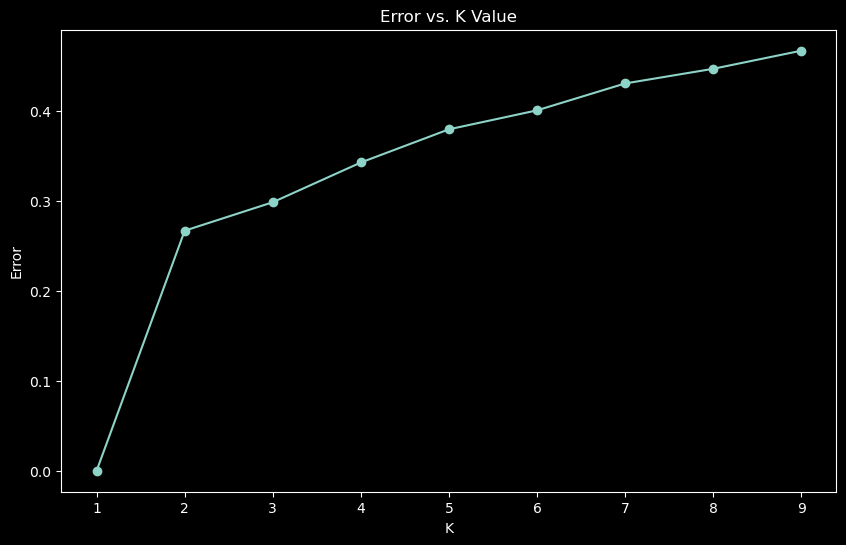

In [28]:
# definimos una lista de valores de K
k_values = range(1, 10)
# guardamos los errores
errors = []

# iteramos sobre los valores de K
for k in tqdm(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error = mean_squared_error(y_train, y_pred)
    errors.append(error)

# graficamos los errores
plt.figure(figsize=(10,6))
plt.plot(k_values, errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Error vs. K Value')
plt.show()


100%|██████████| 29/29 [00:36<00:00,  1.27s/it]


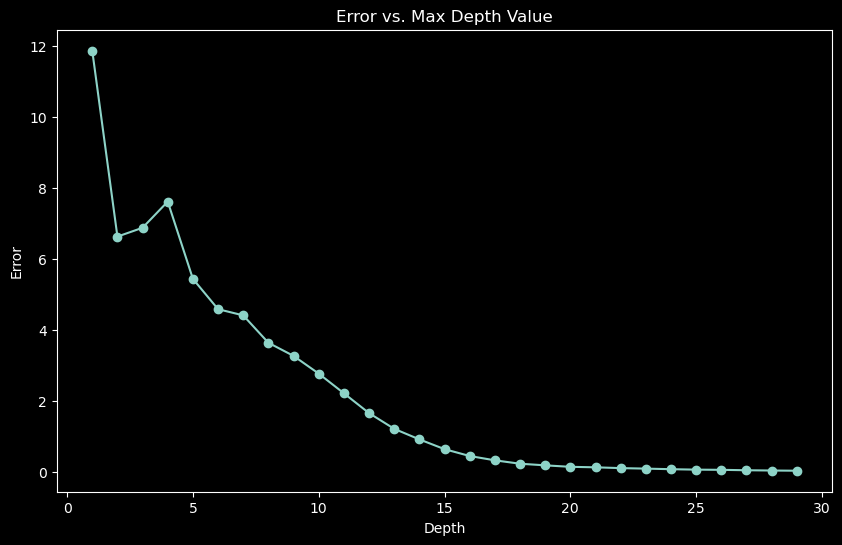

In [29]:
depth_values = range(1, 30)
errors = []

for depth in tqdm(depth_values):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_train)
    error = mean_squared_error(y_train, y_pred)
    errors.append(error)

plt.figure(figsize=(10,6))
plt.plot(depth_values, errors, marker='o')
plt.xlabel('Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth Value')
plt.show()

Ejercicio 3:

Comparar los tres modelos contstruidos utilizando matriz de confusion y alguna metrica de error que considere conveniente

In [30]:
# Su codigo
# Importamos las librerías necesarias
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [31]:
# Creamos los modelos con los parámetros óptimos (ajústalos según tus necesidades)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=5000)
dt = DecisionTreeClassifier(max_depth=10)

# Entrenamos los modelos
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Hacemos las predicciones
y_pred_knn = knn.predict(X_train)
y_pred_lr = lr.predict(X_train)
y_pred_dt = dt.predict(X_train)

In [32]:
# Calculamos la precisión de los modelos
print('Accuracy KNN:', accuracy_score(y_train, y_pred_knn))
print('Accuracy Logistic Regression:', accuracy_score(y_train, y_pred_lr))
print('Accuracy Decision Tree:', accuracy_score(y_train, y_pred_dt))

Accuracy KNN: 0.9803666666666667
Accuracy Logistic Regression: 0.9094666666666666
Accuracy Decision Tree: 0.8396


/home/k/miniconda3/envs/ml_entrega_3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/k/miniconda3/envs/ml_entrega_3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/k/miniconda3/envs/ml_entrega_3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecate

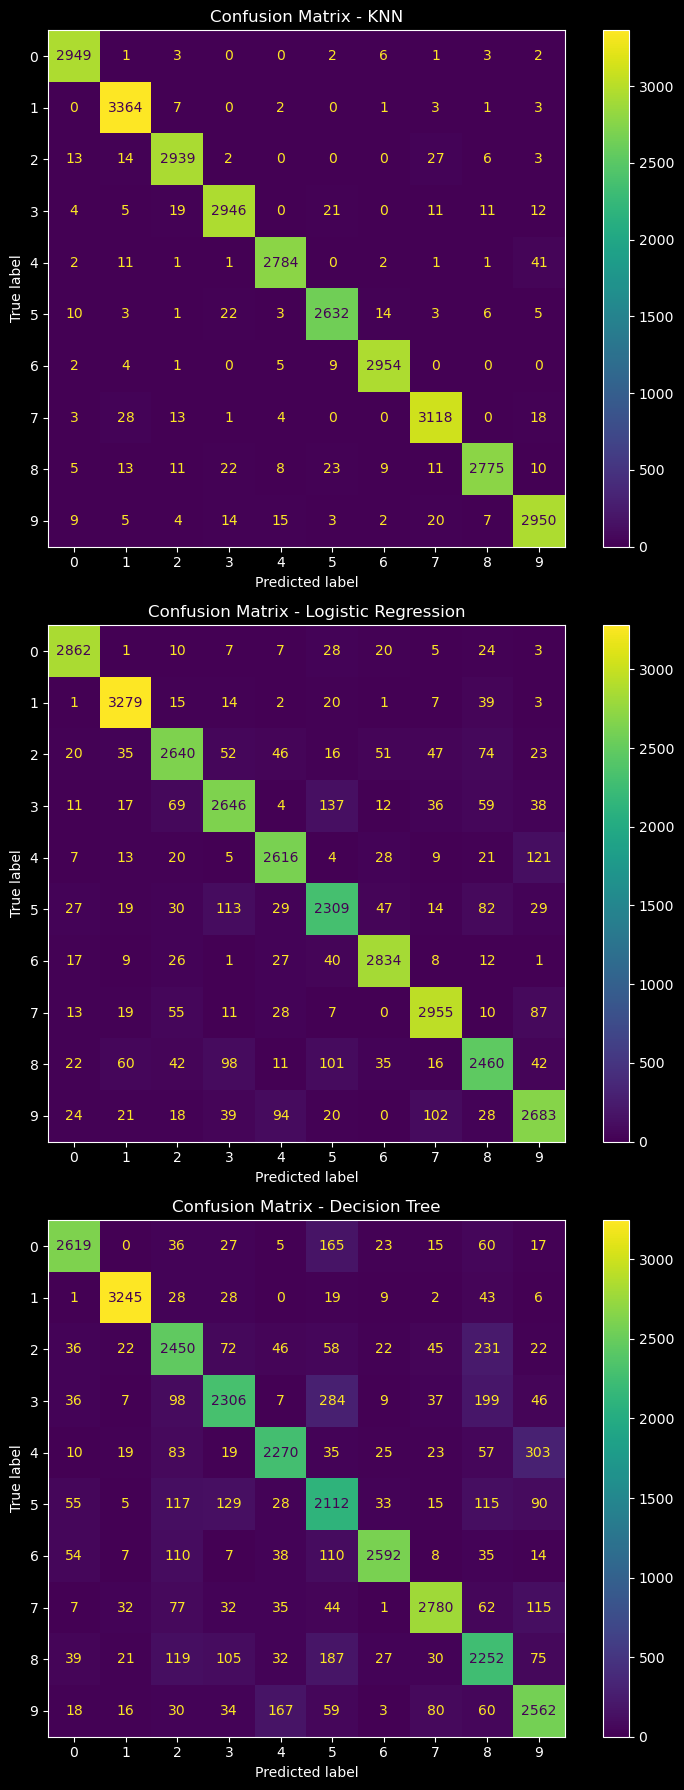

In [33]:
# Matrices de confusión
fig, axs = plt.subplots(3, figsize=(8,18))

plot_confusion_matrix(knn, X_train, y_train, ax=axs[0])
axs[0].set_title('Confusion Matrix - KNN')

plot_confusion_matrix(lr, X_train, y_train, ax=axs[1])
axs[1].set_title('Confusion Matrix - Logistic Regression')

plot_confusion_matrix(dt, X_train, y_train, ax=axs[2])
axs[2].set_title('Confusion Matrix - Decision Tree')

plt.tight_layout()
plt.show()

Ejercicio 4:

Seleccionar el modelo que entiende tiene una mejor rendimeinto y justificar

K-Nearest Neighbors (KNN): Este modelo tiene la mayor precisión (98.04%) y requiere un tiempo de ejecución moderado (~12 segundos en mi caso).

Regresión logística: Este modelo tiene una precisión bastante buena (90.95%), pero requiere la mayor cantidad de tiempo para entrenarse (~1 minuto en mi caso). La regresión logística tiene la ventaja de proporcionar probabilidades para las predicciones y puede ser útil si se necesita una medida de incertidumbre en las predicciones.

Árbol de Decisión: Este modelo tiene la menor precisión de los tres (83.96%), pero es el más rápido para entrenarse (~2 segundos en mi caso).

En base a estos factores, si el tiempo de entrenamiento es una preocupación moderada y se necesita un modelo con una alta precisión, **KNN parece ser la mejor opción**. Proporciona una precisión alta y un tiempo de entrenamiento moderado.